# Can hitters change their behavior in different game situations? #
In recent years, there has a proliferation of defensive shifts in baseball. Teams identify a hitter's tendencies, and then change their positioning on the field to maximize their chances of getting the hitter out. We've seen this in the most extreme where the right side of the infield is overloaded - the 3rd baseman plays at the shortstop position, the shortstop is positioned behind 2nd, and the 2nd baseman is in short right field.

The obvious question for a fan seeing a defensive shift is, why don't hitters just hit it to the 3rd base side and take the single? Instead, hitters often hit the ball right into the shift. As long as the shift is working, teams will continue to use it to increase their chances of getting hitters out.

There is another question that arises about hitters - can hitters change their natural tendencies to match the game situation? For example, can hitters who don't hit a lot of fly balls hit a fly ball with a runner on 3rd and no outs to get the sacrifice? Can natural fly ball hitters hit a ground ball to the right side with a runner on 2nd and no outs? There are scenarios when a hitters behavior could have a benefit for the team's ability to score a run.

There is current trend of applying a defensive shift, primarily for left-handed pull hitters. The result is a defensive alignment where the 3rd baseman plays at the shortstop position, the shortstop is behind 2nd base in short center field, and the 2nd baseman is shifted over toward 1st base in short right field. The obvious question is, why don't hitters just adjust their tendencies and hit the ball somewhere else?

## Situational performance scenarios ##
For any game situation, are some players better than other at adjusting their behavior to match the situation? Alternatively, we could ask if there is a change in behavior, whether intentional or not.

* Rockies fans watched for years as Troy Tulowitski came to bat with runners on base and hit a long fly ball out. It's hard not to wonder if he's trying to hit a home run. Whether intentional or unintentional, can we determine if his behavior changes with runners on base, especially in late innings with the game on the line? Is he trying to be the hero?

* With a runner on third and less than two outs, it's nice to see that run score. Yet, batters aren't always successful in hitting a fly ball in that situation. Can we determine if some batters are more likely to hit a fly ball in that situation than they would normally?

* With a runner on 2nd and no outs, getting the runner to 3rd means that the runner scores on a sacrifice fly. In a close game, moving this runner could be key to scoring a winning or tying run. Can we determine if some batters can hit a right-side ground ball in this situation even if they don't normally hit ground balls to the right side?



### Challenges ###
* Using standard statistical methods requires knowing the underlying distribution.
* Distribution might not be normal
* Different sample sizes in different situations skew the results.

# Bootstrapping #
We're going to use bootstrapping to answer questions about players' behavior in different situations. We could also use this approach to determine run production at Coors Field is an outlier compared to other ballparks. Bootstrapping is a technique where we simulate the outcome of a process by sampling randomly from a data set. We use these samples to generate a distribution. We don't need to know the parameters of the distribution, such as mean, std, and median ahead of time, we generate them from our sampling.


## A non-baseball example ##
Let's say you're sitting outside the engineering center one day and you see 10 people walk by, wearing different color jackets. You see,

* 5 black jackets
* 2 red jackets
* 1 blue jacket
* 2 green jackets

From these observations, you wonder what the probability is of seeing a student at CU wearing a red jacket. Your first thought is that it's 20\%. But, your sample size is so small and there are 30K students at CU. What are the mean, std of your observations? 

We can generate a distribution from these 10 observations by simulating the process of observing 10 other people, many times. We randomly draw from the possible values uniformly. In this example, $n = 10$, we can create an array of the 4 distinct value observed in the $n$ observations:
$$[B, B, B, B, B, R, R, BL, G, G]$$

__Bootstrap Resample:__ A set of $n$ draws from the original sample with replacement.

__Draw:__ A draw is a process of selecting one element randomly from our original sample.

### Bootstrap Resample ###
To generate a bootstrap resample in this example, we generate a random number, 1-10, that represents a position in our array of observations. For example, if we randomly generate the numbers 3 and 6, that means that we observed a B and R jacket because they are in the 3 and 6 positions in our array. We need $n$ draws for a complete resample. 

Assume we generate the following draws:

$$[4, 6, 7, 3, 6, 5, 10, 1, 2, 9]$$

it is equivalent to observing:

$$[B, R, R, B, R, B, G, B, B, G]$$

Three of the observations are R, which is equivalent to observing 3/10 red jackets. To generate a distribution of observations, we repeat the resampling process many times, let's say 1,000. We have 1,000 iterations of $n$ draws, and in each of the $n$ draws, there is a number of times that R is observed.

We can implement this process in Python pretty easily. In one run of 1000 resamples, I produced the following values:

* 0-118
* 1-275
* 2-309
* 3-192
* 4-74
* 5-19
* 6-7
* 7-1
* 8-0
* 9-0
* 10-0

The descriptive statistics for this distribution include:

* count=1000.000000
* mean=2.066000
* std=1.308953
* min=0.000000
* 25\%=1.000000
* 50\%=2.000000
* 75\%=3.000000
* max=7.000000


In [2]:
from random import randint
import pandas as pd 
#array of jacket values
jackets = [0,0,0,0,0,1,1,2,3,3]
trials = [0] * 1000
for i in range(0,1000): #1000 trials
    countForTrial = 0
    for j in range(0,10): #10 jackets observed, get their color
        x = randint(0,9)
        if x == 5 or x == 6:
            countForTrial += 1

    trials[i] = countForTrial

trials.sort()
df = pd.DataFrame(trials)
print(df.describe())


                 0
count  1000.000000
mean      2.015000
std       1.260303
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000


## A Baseball Example ##
Tulo...Tulo...Tulo. Did Troy Tulowitski hit more flyballs with a runner on third and less than two outs than he did in other base situations, with less than two outs? 

### What data do we need? ###
* The number of times that Tulo batted with a runner on third and less than two outs, and how many times that resulted in a fly ball.
* The number of times that Tulo batted with no runner on third and less than two outs, and how many times that resulted in a fly ball.

#### Data results ####

* 143 times tulo batted with a runner on third and less than 2 outs
  - 16 times tulo hit a fly-ball out to the outfield

* 1087 times tulo batted with no runner on third and less than 2 outs
  - 132 times tulo hit a fly-ball out to the outfield with no runner on third

__Null Hypothesis: There is no change in Tulo's behavior with a runner on third.__

* The pool of possible values is 143+1087=1230 at-bats. 
  - 16 of 143 is flyball and 132 of 1087 is flyball.
* A draw is 143 at-bats for Tulo to simulate the times he came to bat with runner on third
* In all of his at-bats, how many times did Tulo hit a flyball out? 148
* Need a list of 1230 at-bats, where 0-147 = 1 for flyball out and 148-1229 = 0 for not flyball out

### Simulation results ###
16 of 143 shows up in 250 out of 1000 trials, so p-value of observing 16 flyballs in 143 at bats is .25. We can't reject the null hypothesis. There is no change in his flyball hitting behavior with a runner on third.

Show notebook and histogram.



0.677
                 0
count  1000.000000
mean     17.287000
std       3.810138
min       5.000000
25%      15.000000
50%      17.000000
75%      20.000000
max      29.000000


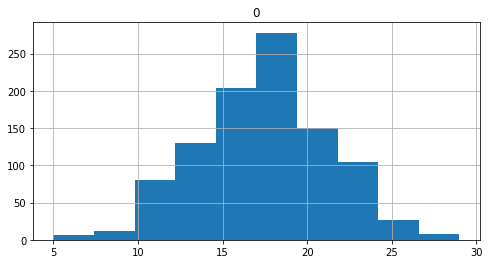

In [9]:
from random import randint
import pandas as pd 
import matplotlib.pylab as plt

#tulo and the flyball out
hits = [0] * 1230
for i in range(0,148):
    hits[i] = 1
trials = [0] * 1000
for i in range(0,1000):
    countForTrial = 0
    for j in range(0,143):
        x = randint(0,1229)
        countForTrial+=hits[x]
    trials[i] = countForTrial
trials.sort()
tr = 0
for t in trials:
    if t == 16:
        tr+=1
print(tr/1000)
df = pd.DataFrame(trials)
print(df.describe())
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
df.hist(ax=ax);
